# Exploring the normal distribution equation and its behaviour when $\sigma \rightarrow 0$

Definition of the normal distribution

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \text{exp}\left[-\frac{1}{2}\left({\frac{x-\mu}{\sigma}}\right)^{2}\right]$$

Definition of the Dirac delta function
$$
\delta(x) = \begin{cases}
   \infty &\text{if } x=0 \\
   0 &\text{if } x\neq0
\end{cases}
\ \ \ \ \ \ \ \ \int_{-\infty}^{\infty} \delta(x) dx = 1
$$


In [1]:
f(σ, μ, x) = 1 / (σ * √(2π)) * exp((-1 / 2) * ((x - μ) / σ)^2);

Animating the normal distribution

In [2]:
using Plots
using LaTeXStrings;

In [3]:
Rectangle(w, h, x, y) = Shape([x, x, x, x] + [0, w, w, 0], [y, y, y, y] + [0, 0, h, h]);

In [4]:
function makeNormalAnimation(σ_list)
    anim = Animation()

    plt_list = []

    for σ in σ_list
        plt = plot(x -> f(σ, 0, x), -2, 2, xlims=(-2, 2), ylims=(0, 10), legend=false, linewidth=2, xlabel="x", ylabel="f(x)")

        plot!(plt, Rectangle(0.5, 0.2, 1, 3), color=RGB(1, 1, 1))
        annotate!(1, 2.8, text("0", :black, :center, 10))
        annotate!(1.5, 2.8, text("1", :black, :center, 10))
        annotate!(1.25, 3.5, text("σ", :black, :center, 10))
        annotate!(1.25, 5, text(L"f(x) = \frac{1}{\sigma\sqrt{2 \pi}} \cdot \textrm{exp}\left[-\frac{1}{2}\left({\frac{x}{\sigma}}\right)^{2}\right]", :black, :center, 10))

        plot!(plt, Rectangle(σ / 2, 0.2, 1, 3), color=RGB(0, 0, 1))

        push!(plt_list, plt)
    end

    for plt in plt_list
        frame(anim, plt)
    end

    for plt in reverse(plt_list)
        frame(anim, plt)
    end

    return anim
end;

Result

In [5]:
anim = makeNormalAnimation(1:-0.02:0.02);

Plots.AnimatedGif("/home/mateus/Downloads/normal_dist.gif")
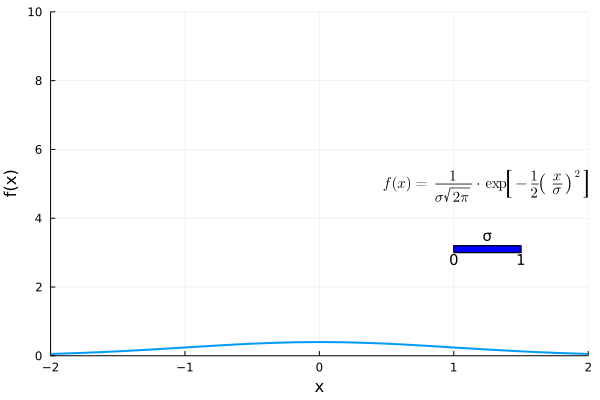

In [6]:
gif(anim,
    # "normal_dist.gif",
    fps=25,
    show_msg=false)

We obtain the Dirac delta function when $\sigma \rightarrow 0$